In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [19]:
aapl = yf.Ticker("AAPL")

In [20]:
aapl_price = aapl.history(period='3y', interval='1d')

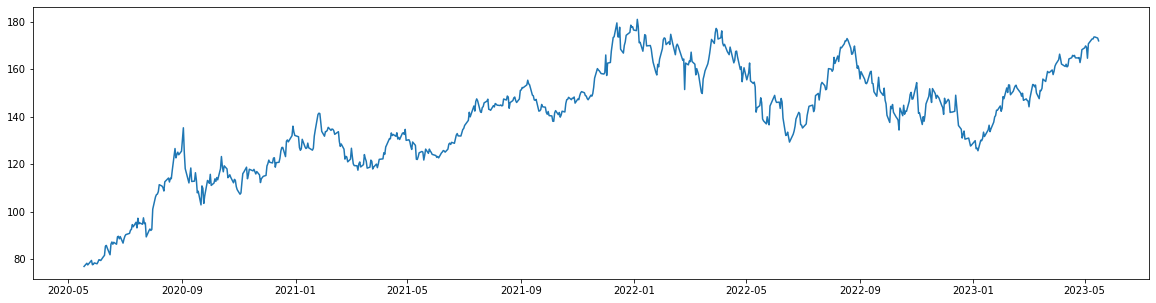

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(aapl_price['Open'])

In [35]:
ys = np.array(aapl_price['Open'])
ys = ys.reshape(len(ys), 1)
xs = np.linspace(1, len(ys), len(ys))
xs = xs.reshape(len(xs), 1)

In [36]:

model = LinearRegression()
model.fit(xs, ys)

LinearRegression()

In [37]:
y_pred = model.predict(xs)

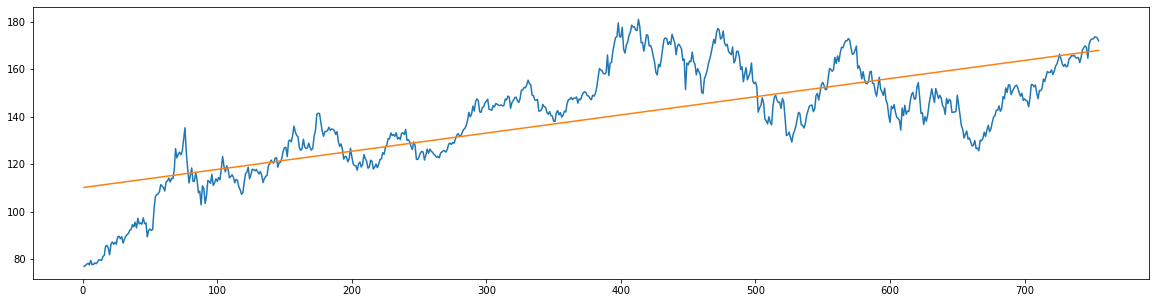

In [40]:
plt.figure(figsize=(20, 5))
plt.plot(xs, aapl_price["Open"])
plt.plot(xs, y_pred)

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [90]:
nvda = yf.Ticker("META")

In [91]:
data = nvda.history(period='3y', interval='1d')

In [92]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-05-18 00:00:00-04:00,212.149994,214.639999,210.940002,213.190002,20151900,0.0,0.0
2020-05-19 00:00:00-04:00,213.270004,220.490005,212.830002,216.880005,31843200,0.0,0.0
2020-05-20 00:00:00-04:00,223.500000,231.339996,223.190002,229.970001,50162900,0.0,0.0
2020-05-21 00:00:00-04:00,234.720001,237.199997,231.199997,231.389999,47782600,0.0,0.0
2020-05-22 00:00:00-04:00,231.509995,235.990005,228.740005,234.910004,33925600,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-10 00:00:00-04:00,236.169998,236.750000,230.720001,233.080002,19119000,0.0,0.0
2023-05-11 00:00:00-04:00,233.050003,238.210007,232.300003,235.789993,20449000,0.0,0.0
2023-05-12 00:00:00-04:00,236.740005,236.960007,231.449997,233.809998,16155300,0.0,0.0


In [88]:
# scaler = MinMaxScaler(feature_range=(0, 100))
# scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])

In [93]:
window = 10
def calc_dataset(dataset, window):
    x, y = [], []
    for i in range(len(dataset)-window-1):
        x.append(dataset[i:(i+window), :])
        y.append(dataset[i+window, 3])
    return np.array(x), np.array(y)


In [94]:
scaler = MinMaxScaler(feature_range=(0, 1000))
dataset = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])

In [95]:
x, y = calc_dataset(dataset, window)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)


In [129]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=100, activation='relu', input_shape=(10, 5), return_sequences=True),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=100, activation='relu', return_sequences=True),
    # tf.keras.layers.Dense(40),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=100, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(units=100, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [130]:
model.compile(optimizer='adam', loss='mse')

In [131]:
model.fit(X_train, y_train, epochs=30, batch_size=5, verbose=1)

Epoch 1/30
119/119 [==============================] - 4s 17ms/step - loss: 54514.1992
Epoch 2/30
119/119 [==============================] - 2s 16ms/step - loss: 4524.2129
Epoch 3/30
119/119 [==============================] - 2s 16ms/step - loss: 3946.4097
Epoch 4/30
119/119 [==============================] - 2s 16ms/step - loss: 2971.5234
Epoch 5/30
119/119 [==============================] - 2s 16ms/step - loss: 3061.4607
Epoch 6/30
119/119 [==============================] - 2s 16ms/step - loss: 4970.8110
Epoch 7/30
119/119 [==============================] - 2s 16ms/step - loss: 3917.9377
Epoch 8/30
119/119 [==============================] - 2s 16ms/step - loss: 2881.9158
Epoch 9/30
119/119 [==============================] - 2s 15ms/step - loss: 2475.4702
Epoch 10/30
119/119 [==============================] - 3s 22ms/step - loss: 2553.2976
Epoch 11/30
119/119 [==============================] - 2s 20ms/step - loss: 2926.0845
Epoch 12/30
119/119 [==============================] - 2s 16ms

In [127]:
train_pred = model.predict(X_train, batch_size=1)
test_pred = model.predict(X_test, batch_size=1)

149/149 [==============================] - 1s 4ms/step


In [128]:
train_score = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(y_test, test_pred))
print('Test Score: %.2f RMSE' % (test_score))

Train Score: 47.94 RMSE
Test Score: 56.96 RMSE


In [48]:
train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform(y_train)
test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform(y_test)

ValueError: non-broadcastable output operand with shape (595,1) doesn't match the broadcast shape (595,5)

ValueError: in user code:

    File "C:\Users\jleus\anaconda3\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\jleus\anaconda3\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jleus\anaconda3\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\jleus\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\jleus\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\jleus\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 90, 5), found shape=(None, 5)
